# Exercises

## Exercise 1
---
Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5 s, 10 s, 20 s, 40 s, 80 s, 160 s, 320 s, 640 s). Compute the Pearson correlation between true and estimated RFs for each duration to quantify the accuracy of the estimator. The Pearson correlation $\mathrm{cc}$ is defined as
$$
\mathrm{cc} = \frac{\mathbf{k}_\mathrm{true}^T \hat{\mathbf{k}}}{\lVert \mathbf{k}_\mathrm{true} \rVert \lVert \hat{\mathbf{k}} \rVert}
$$
where $\lVert \cdot \rVert$ is the L2-norm (vector length).
As the response generation process is stochastic, compute the average correlation across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true RF? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import linalg as LA

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
def exercise1(dur):
    duration = dur
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    n_bins = round(duration / float(dt))
    
    
    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

    size = vf_size # size in pixel of our receptive field
    mu = (8, 8) # center of the gabor pathc
    sigma = (4,4) #size of the gabor patch
    angle = 45 # orientation of the gabor patch
    frequency = .085 # spatial frequency of the gabor patch
    phase = 0 # pahse of the gabor pathc
    
    
    xx, yy = np.meshgrid(1. + np.arange(size[0]),
                             1. + np.arange(size[1]))
    
    # Gaussian envelope
    G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
                - np.power(yy - mu[1], 2) / (2. * sigma[1]))
    
    # spatial modulation
    phi = np.deg2rad(angle)
    xxr = xx * np.cos(phi)
    yyr = yy * np.sin(phi)
    xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
    Sn = np.cos(xyr + phase)
    
    K = G * Sn
    K /= np.amax(np.abs(K))
    
    noise_variance = 1
    offset = 2.
    
    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))
    
    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))
    
    
    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)
    
    # 2. nonlinear stage (for a linear model: f -> identity function)
    rate = ks
    
    # add Gaussian noise centered around the "true" rate for each bin
    rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)


    #S_flat = S_flat.T
    K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
    K_hat = K_hat[:-1].reshape(vf_size)

    return K_hat, K
    
def Pearson_correlation(k_hat,k):
    return np.dot(k_hat.flat,k.flat)/(LA.norm(k)*LA.norm(k_hat))


Correlation at duration 5s =0.3564251753068025
Correlation at duration 10s =0.46552357094459434
Correlation at duration 20s =0.54532933743833
Correlation at duration 40s =0.9329562203991429
Correlation at duration 80s =0.9741709315591985
Correlation at duration 160s =0.9899553634381542
Correlation at duration 320s =0.9947816495643267
Correlation at duration 640s =0.9973356885938125


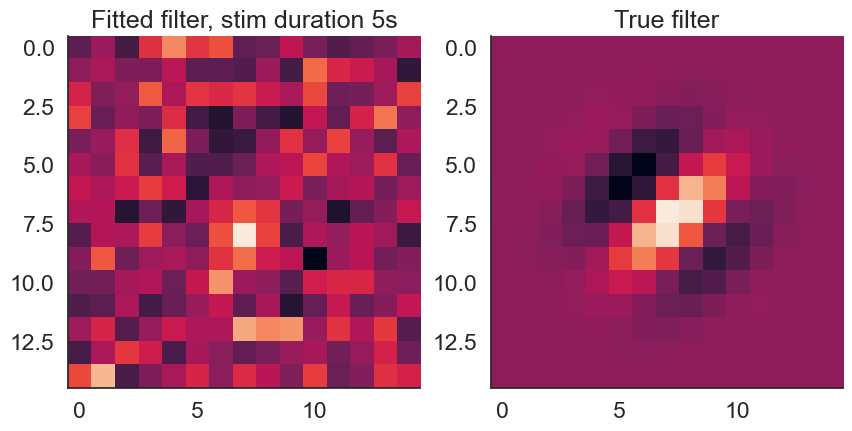

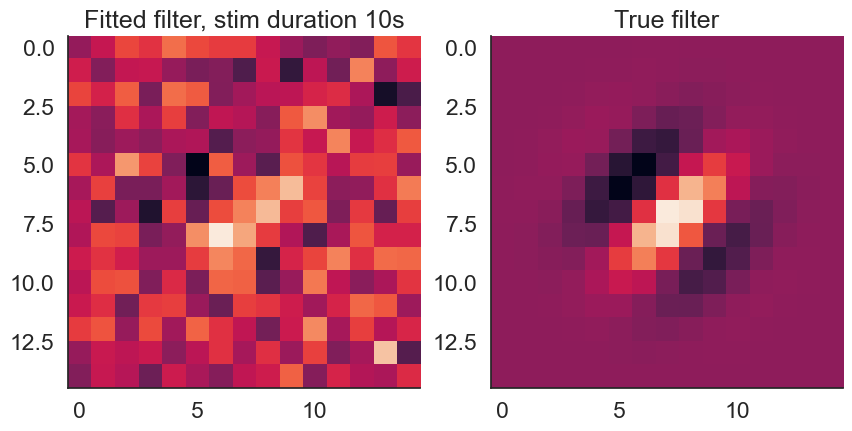

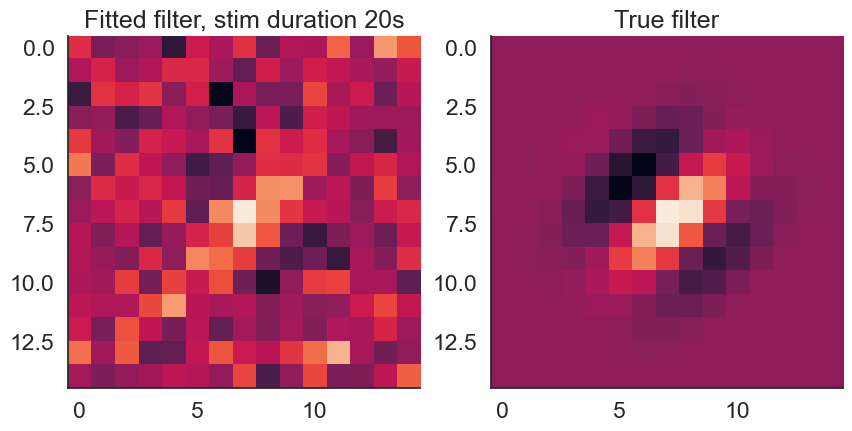

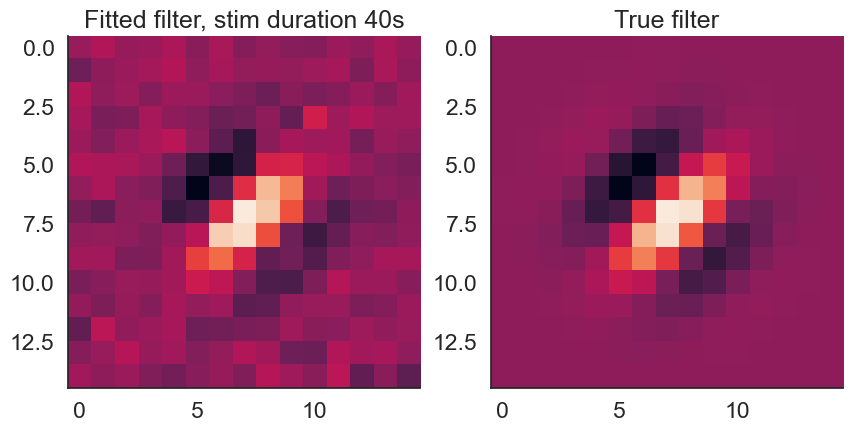

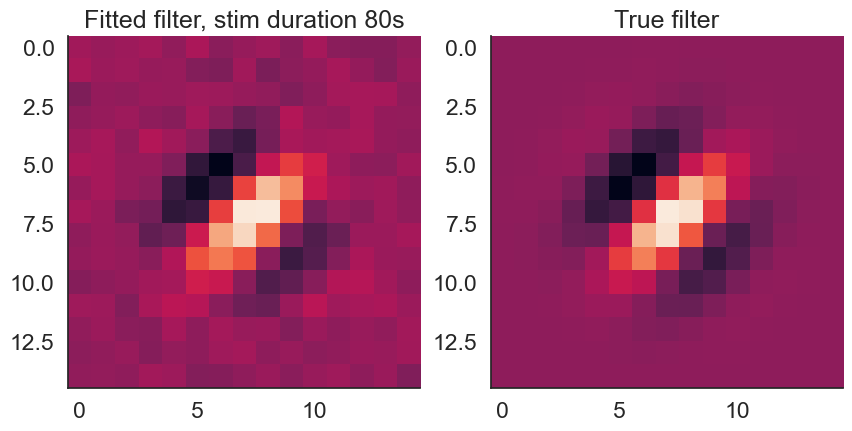

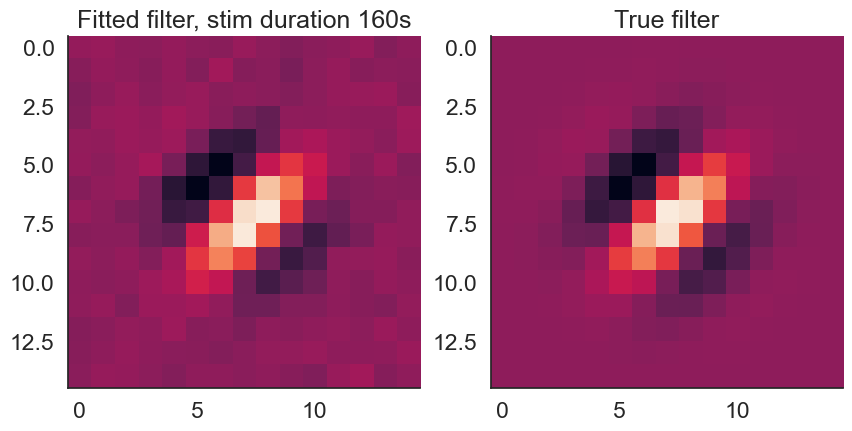

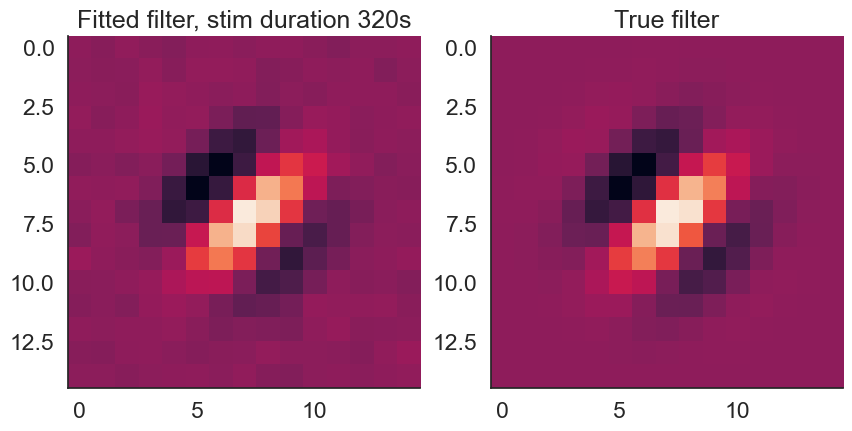

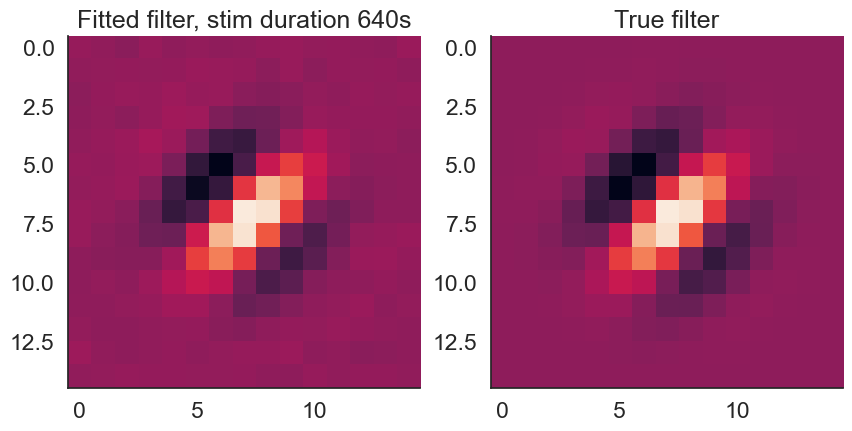

In [3]:
duration = [5, 10, 20, 40, 80, 160, 320, 640]

for d in duration:
    K_hat , K = exercise1(d)
    #print(K_hat,K)
    print("Correlation at duration "+str(d)+"s ="+str(Pearson_correlation(K_hat,K)))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Fitted filter, stim duration '+str(d)+"s")
    plt.imshow(K_hat)
    plt.subplot(1,2,2)
    plt.title('True filter')
    plt.imshow(K)

In [4]:
duration = [5, 10, 20, 40, 80, 160, 320, 640]
corrs = np.zeros(len(duration))

for d in range(len(duration)):
    for _ in range(10):
        K_hat , K = exercise1(duration[d])
        
        corrs[d] = corrs[d] + Pearson_correlation(K_hat,K)

    corrs[d] = corrs[d]/10

Text(0, 0.5, 'Mean correlation')

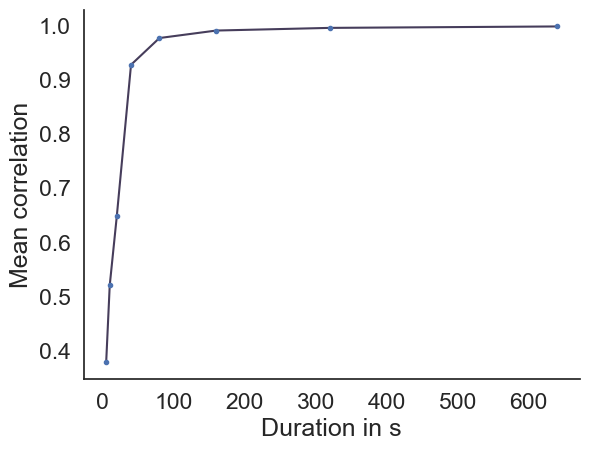

In [5]:
plt.plot(duration,corrs, color = '#463D5B')
plt.plot(duration,corrs,  '.')
plt.xlabel(r'Duration in s')
plt.ylabel(r'Mean correlation')

We see that the correlation goes up fast quite fast. We also see that for shorter durations we already get very good results, so we don't need to go up that high.

## Exercise 2
---
Determine the effect of response noise ($\sigma^2$) on RF estimates. Try different value for the noise variance in the simulations, e.g., 0, 2, 4, 6, 8, and 10 for a duration of 100 s. As in the previous excercise, repeatedly estimate RF parameters for each condition (10 times) but this time also plot the standard deviation of the correlations across the different runs for each condition.

In [6]:
def exercise2(standard):
    duration = 100
    dt = .1
    std_dev = standard
    vf_size = (15,15)
    n_bins = round(duration / float(dt))
    
    
    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

    size = vf_size # size in pixel of our receptive field
    mu = (8, 8) # center of the gabor pathc
    sigma = (4,4) #size of the gabor patch
    angle = 45 # orientation of the gabor patch
    frequency = .085 # spatial frequency of the gabor patch
    phase = 0 # pahse of the gabor pathc
    
    
    xx, yy = np.meshgrid(1. + np.arange(size[0]),
                             1. + np.arange(size[1]))
    
    # Gaussian envelope
    G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
                - np.power(yy - mu[1], 2) / (2. * sigma[1]))
    
    # spatial modulation
    phi = np.deg2rad(angle)
    xxr = xx * np.cos(phi)
    yyr = yy * np.sin(phi)
    xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
    Sn = np.cos(xyr + phase)
    
    K = G * Sn
    K /= np.amax(np.abs(K))
    
    noise_variance = 1
    offset = 2.
    
    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))
    
    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))
    
    
    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)
    
    # 2. nonlinear stage (for a linear model: f -> identity function)
    rate = ks
    
    # add Gaussian noise centered around the "true" rate for each bin
    rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)


    #S_flat = S_flat.T
    K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
    K_hat = K_hat[:-1].reshape(vf_size)

    return K_hat, K

In [7]:
std = [0, 2, 4, 6, 8, 10]
corrs = np.zeros((len(std),10))

for d in range(len(std)):
    for i in range(10):
        K_hat , K = exercise1(std[d])
        
        corrs[d,i] = Pearson_correlation(K_hat,K)


corrs_mean = np.mean(corrs, axis = 1)
corrs_std = np.std(corrs, axis = 1)

/var/folders/gw/1gkg7kb92xlb5cvtzpqrsmk40000gn/T/ipykernel_27681/394631770.py:64: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(k_hat.flat,k.flat)/(LA.norm(k)*LA.norm(k_hat))


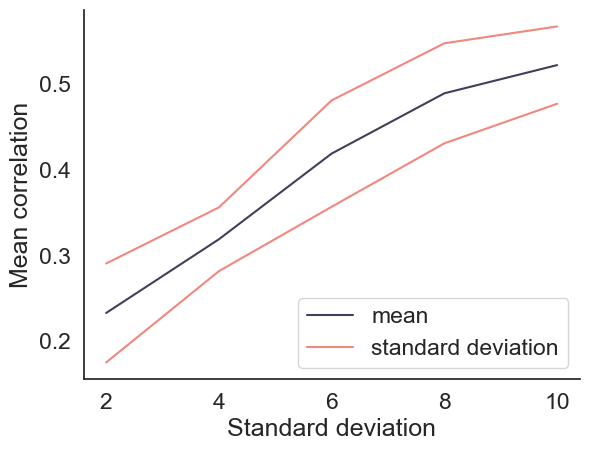

In [8]:
plt.plot(std,corrs_mean, color = '#463D5B', label = "mean")
plt.plot(std,corrs_mean+corrs_std,color = '#F2877C')
plt.plot(std,corrs_mean-corrs_std, color = '#F2877C',label = "standard deviation")
plt.xlabel(r'Standard deviation')
plt.ylabel(r'Mean correlation')
plt.legend()

The correlation goes up with higher standard deviation, which is interesting since the stimuli get noisier and it should be harder to get close to them, is they behave more irregular. The correlation values spread similarly for growing noise scales.

## Exercise 3
---
Look at the analytical derivation of the log-likelihood for the poisson GLM.
Which of the terms are required for maximizing the likelihood with respect to $\mathbf{k}$ and which terms can be ignored? **Note:** due to the independence of spikes in the different bins, the likelihood can be written as $P(R | S, \mathbf{k}) = \prod_t^T P(r_t | \mathbf{s}_t, \mathbf{k})$. The log turns the product into a sum which makes life much easier. 




Firstly: right? Logarithms and factorization work very well together, its so nice.

Secondly: If we want to minimize of the log likelihood

\begin{equation}
    \log P(r_t | \lambda_t) = r_t\log \lambda_t + r_t\log \Delta - \log r_t! - \lambda_t \Delta.
\end{equation}

we can ignore the terms $r_t\log \Delta$ and $\lambda_t \Delta$, since they don't depent on $\mathbf{k}$, but I don't know if that is what is meant here.

If we look at the final expression 
\begin{equation}
\frac{\partial{\log P}}{\partial{\mathbf{k}}} = \sum_t r_t \mathbf{s}_t - \Delta \sum_t \mathbf{s}_t \lambda_t
\end{equation}
we see a dependency on the variables.

## Exercise 4
---
Explore the effect of the data duration and the firing rate on the goodness of fit of the Poisson GLM.

A - Generate data with durations of 10,20,50,100 and 200 seconds. Fit the model on each dataset and plot the fitted parameters.
Use the pearson correlation as a proxy of the goodness of fit, and plot it as a function of the duration of the data.

B - Fix the duration to 100s, and change the average firing rate of the simulation. How does the fit perform for different firing rates? 

In [25]:
def exercise4(dur):
    duration = dur
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    n_bins = round(duration / float(dt))
    
    
    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])
    
    def generate_inhomogeneous_poisson_spikes(lamda, dt):
    
        n_bins = lamda.shape[0]
        bins = np.arange(n_bins+1)*dt
    
        # generate Poisson distributed numbers for all bins with the max. intensity (lamda_max)
        lamda_max = np.max(lamda)
        poisson_numbers = np.random.poisson(lamda_max, size=n_bins)
    
        # throw away numbers depending on the actual intensity ("thinning")
        spike_times = []
        prob = lamda / lamda_max
        for i in range(n_bins):
            
            # number of spikes to keep in this bin
            n = np.sum(np.random.rand(poisson_numbers[i]) < prob[i])
            n_s = int(round(n * dt))
    
            # generate random spike times in this bin
            ts = bins[i] + np.random.rand(n_s)*dt
    
            spike_times.extend(ts)
    
        return np.asarray(spike_times)
    
    spike_rate = 5 # average firing rate 
    
    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))
    
    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))
    
    
    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)
    
    # 2. nonlinear stage (for a linear model: f -> identity function)
    lamda = np.exp(ks)
    
    # lamda * dt is the number of spikes in the different bins (but keep in mind that the Poisson process
    # is a stochastic process so the actual number will differ for every draw). Thus, the sum of the product 
    # across all bins gives the expected number of spikes for the whole draw.
    expected_rate = np.sum(lamda*dt) / duration
    lamda *= (spike_rate / expected_rate)
    
    # generate spike times using an inhomogeneous Poisson process
    spike_times = generate_inhomogeneous_poisson_spikes(lamda, dt)
    
    # compute spike counts in the different time bins
    spike_counts = np.histogram(spike_times,
                                bins=np.arange(n_bins+1)*dt)[0]
    
    from scipy.optimize import minimize
    
    # define functions for minimisation
    def cost(k, spike_counts, S,alpha=1):
        #negative loglikelihood function to minimize
        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(spike_counts, ks) + dt * np.sum(lamda)
        
        
    def grad(k, spike_counts, S):
        # expression of the gradient of the negative log likelihood (note the sign is flipped accordingly)
    
        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(S.T, spike_counts - dt*lamda)
    
    k_STA = np.inner(S_flat.T, spike_counts) / np.sum(spike_counts)
    res = minimize(fun = cost, x0 = k_STA / 10, args = (spike_counts, S_flat), method = 'Newton-CG', jac = grad)

    K_est = res.x
    
    return K_est




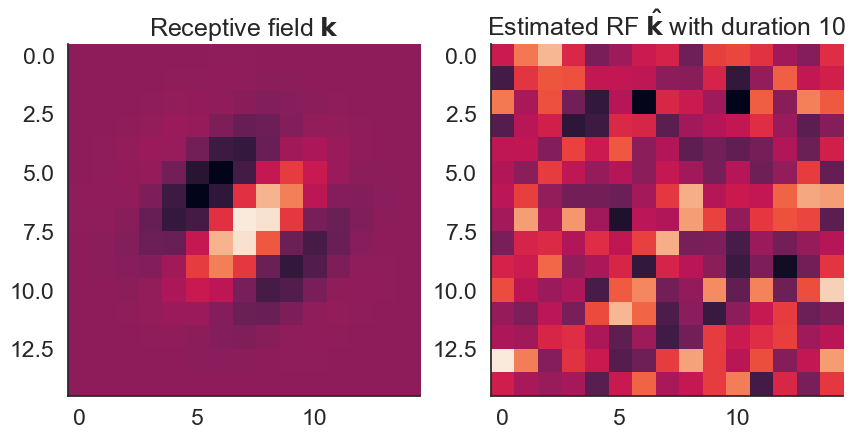

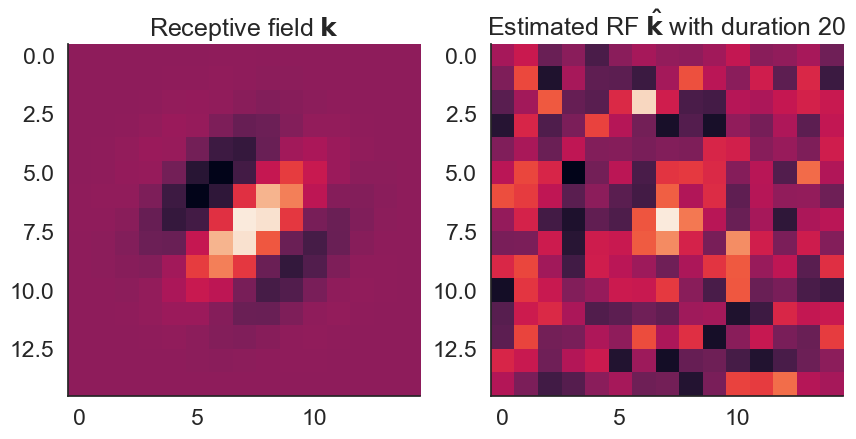

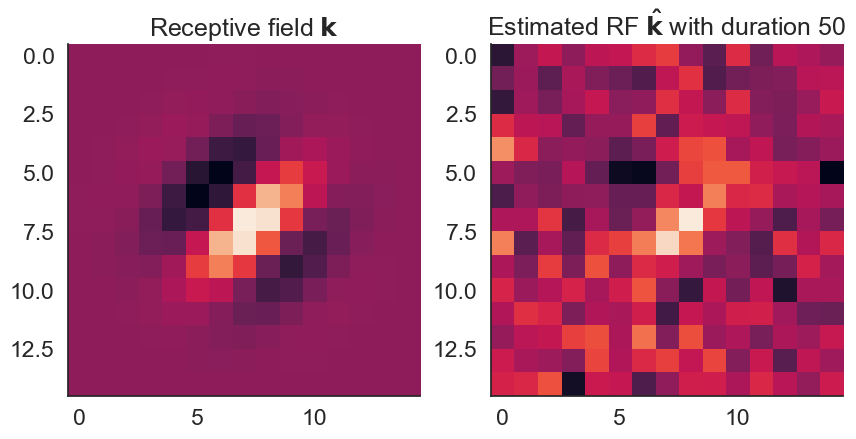

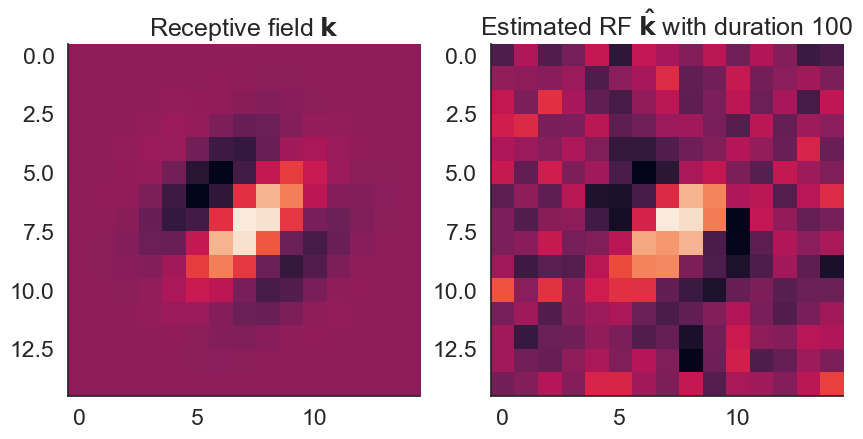

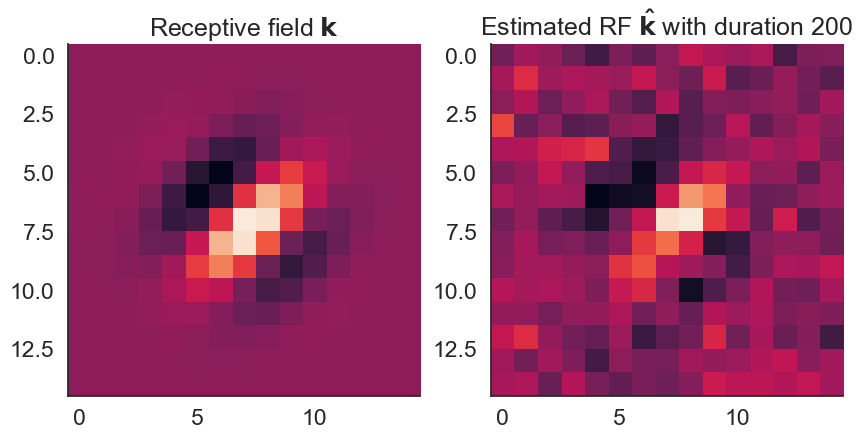

In [28]:
durations = [10,20,50,100, 200 ]

corrs = []

for d in durations:
    K_est = exercise4(d)
    corrs.append(Pearson_correlation(K_est[:-1],K))
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(r'Receptive field $\mathbf{k}$')
    plt.imshow(K)
    
    plt.subplot(1,2,2)
    plt.title(r'Estimated RF $\mathbf{\hat{k}}$ with duration '+str(d))
    plt.imshow(K_est[:-1].reshape(15, 15)) 


Text(0, 0.5, 'Correlation')

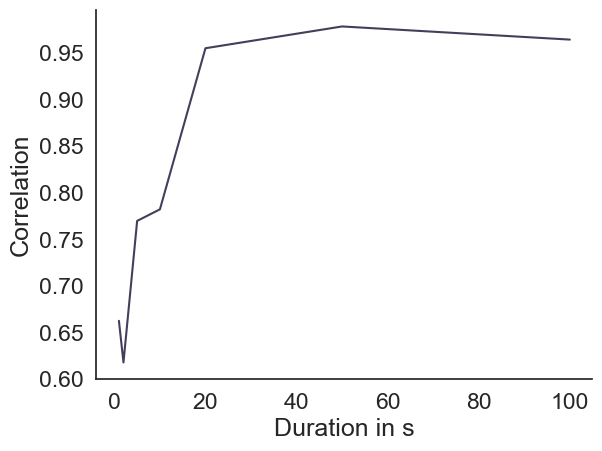

In [39]:
plt.plot(durations,corrs, color = "#463D5B")
plt.xlabel('Duration in s')
plt.ylabel('Correlation')

Here, again, the correlation goes up for longer duration of the stimuli, with the difference that there is an optimum around 50s.

In [41]:
def exercise4_spike(rate):
    duration = 100
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    n_bins = round(duration / float(dt))
    
    
    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])
    
    def generate_inhomogeneous_poisson_spikes(lamda, dt):
    
        n_bins = lamda.shape[0]
        bins = np.arange(n_bins+1)*dt
    
        # generate Poisson distributed numbers for all bins with the max. intensity (lamda_max)
        lamda_max = np.max(lamda)
        poisson_numbers = np.random.poisson(lamda_max, size=n_bins)
    
        # throw away numbers depending on the actual intensity ("thinning")
        spike_times = []
        prob = lamda / lamda_max
        for i in range(n_bins):
            
            # number of spikes to keep in this bin
            n = np.sum(np.random.rand(poisson_numbers[i]) < prob[i])
            n_s = int(round(n * dt))
    
            # generate random spike times in this bin
            ts = bins[i] + np.random.rand(n_s)*dt
    
            spike_times.extend(ts)
    
        return np.asarray(spike_times)
    
    spike_rate = rate # average firing rate 
    
    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))
    
    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))
    
    
    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)
    
    # 2. nonlinear stage (for a linear model: f -> identity function)
    lamda = np.exp(ks)
    
    # lamda * dt is the number of spikes in the different bins (but keep in mind that the Poisson process
    # is a stochastic process so the actual number will differ for every draw). Thus, the sum of the product 
    # across all bins gives the expected number of spikes for the whole draw.
    expected_rate = np.sum(lamda*dt) / duration
    lamda *= (spike_rate / expected_rate)
    
    # generate spike times using an inhomogeneous Poisson process
    spike_times = generate_inhomogeneous_poisson_spikes(lamda, dt)
    
    # compute spike counts in the different time bins
    spike_counts = np.histogram(spike_times,
                                bins=np.arange(n_bins+1)*dt)[0]
    
    from scipy.optimize import minimize
    
    # define functions for minimisation
    def cost(k, spike_counts, S,alpha=1):
        #negative loglikelihood function to minimize
        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(spike_counts, ks) + dt * np.sum(lamda)
        
        
    def grad(k, spike_counts, S):
        # expression of the gradient of the negative log likelihood (note the sign is flipped accordingly)
    
        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(S.T, spike_counts - dt*lamda)
    
    k_STA = np.inner(S_flat.T, spike_counts) / np.sum(spike_counts)
    res = minimize(fun = cost, x0 = k_STA / 10, args = (spike_counts, S_flat), method = 'Newton-CG', jac = grad)

    K_est = res.x
    
    return K_est

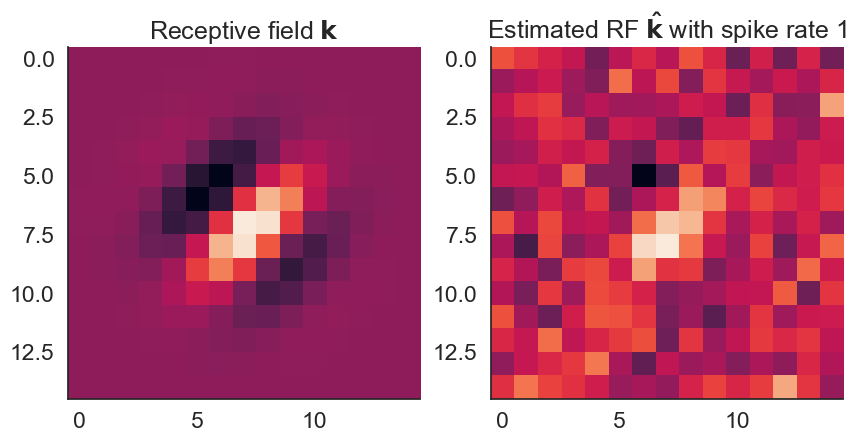

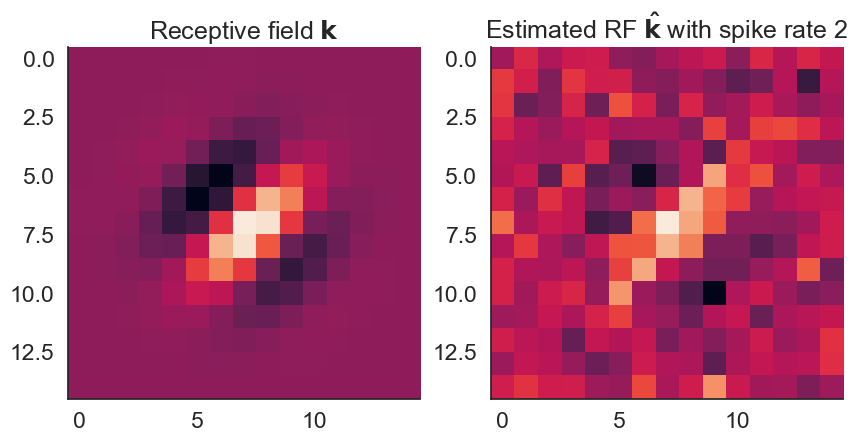

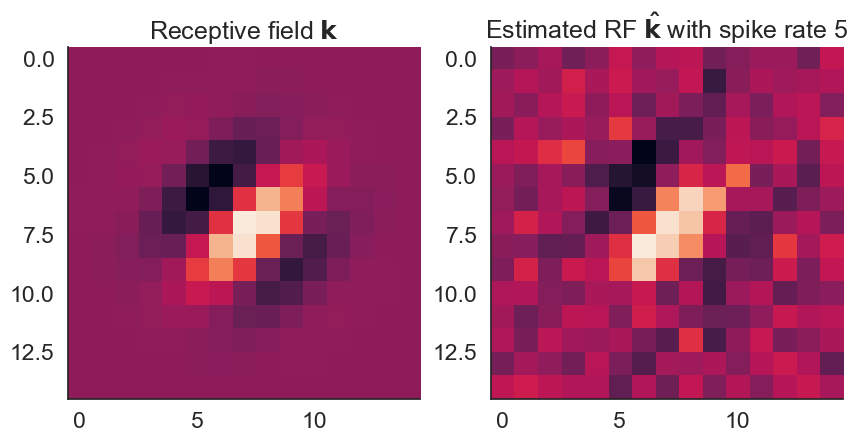

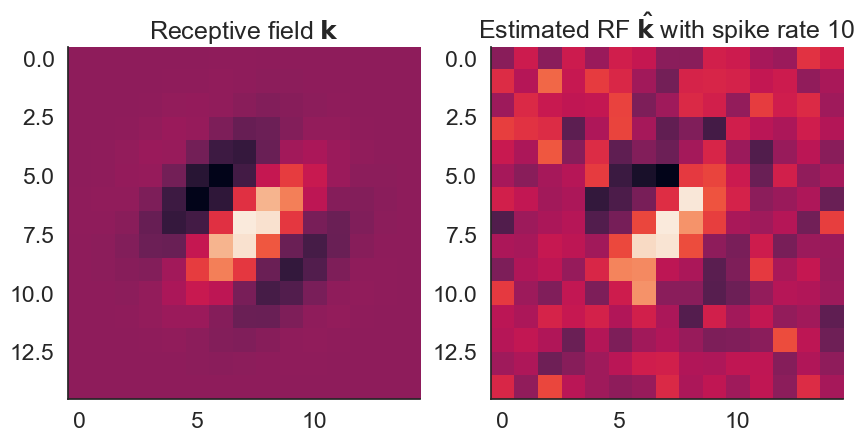

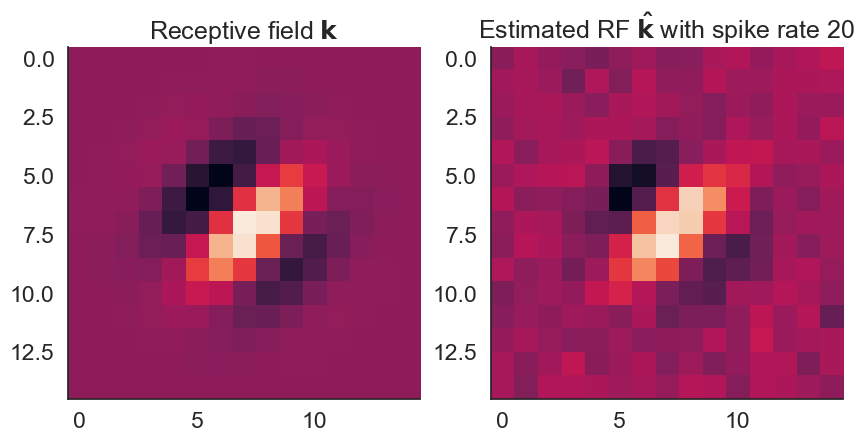

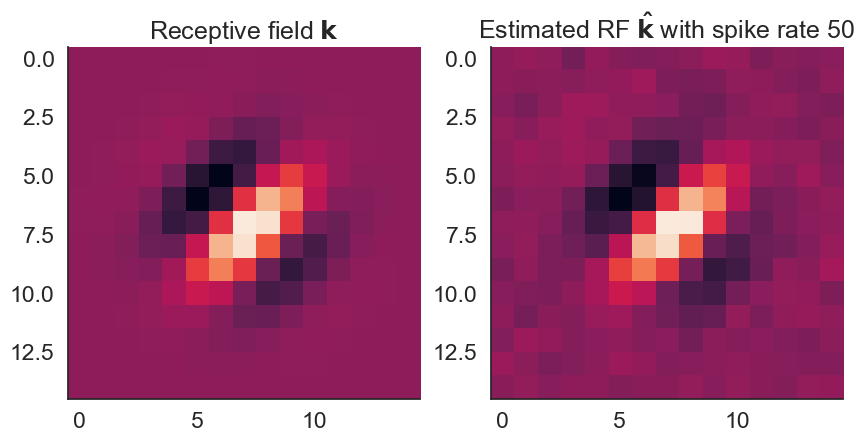

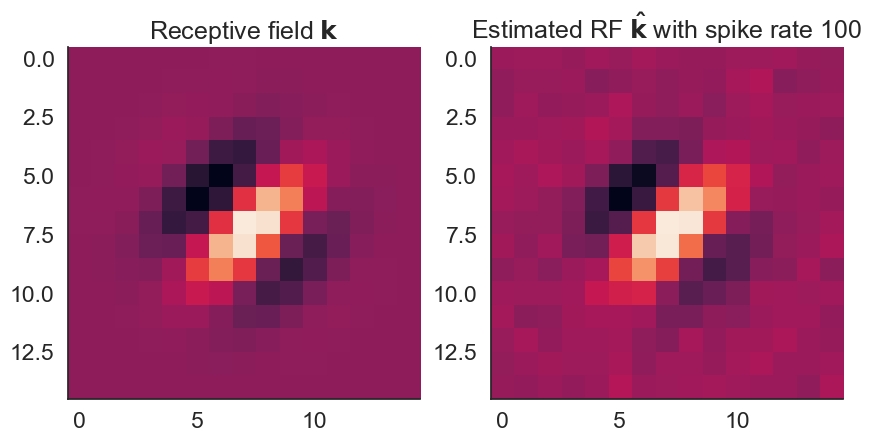

In [42]:
durations = [1,2,5,10,20,50,100]

corrs = []

for d in durations:
    K_est = exercise4_spike(d)
    corrs.append(Pearson_correlation(K_est[:-1],K))
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(r'Receptive field $\mathbf{k}$')
    plt.imshow(K)
    
    plt.subplot(1,2,2)
    plt.title(r'Estimated RF $\mathbf{\hat{k}}$ with spike rate '+str(d))
    plt.imshow(K_est[:-1].reshape(15, 15)) 

Text(0, 0.5, 'Correlation')

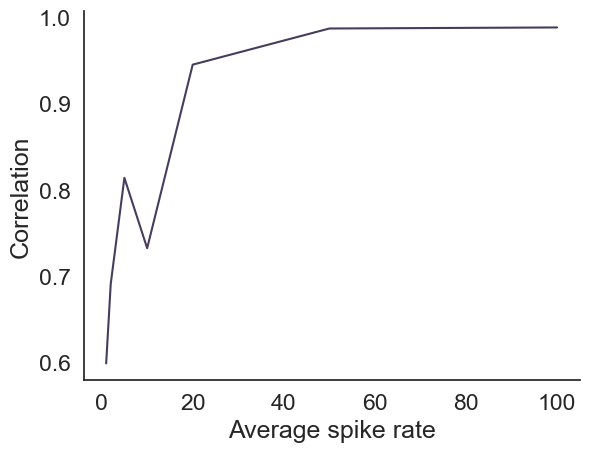

In [44]:
plt.plot(durations,corrs, color = "#463D5B")
plt.xlabel('Average spike rate')
plt.ylabel('Correlation')

Its very interesting to see that here as well the correlation doesn't necessarily go uo with the spike rate. We see here an optimum for the value 50. But between different runs there is also a very high variation of the values.